In [28]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action="ignore")


## 데이터 재구조화 

In [19]:
mul_index = pd.MultiIndex.from_tuples([('cust_1', '2020'), ('cust_1', '2021'),

   ('cust_2', '2020'), ('cust_2', '2021')])  



data =pd.DataFrame(data=np.arange(16).reshape(4, 4),

   index=mul_index,

   columns=['prd_1', 'prd_2', 'prd_3', 'prd_4'],

   dtype='int')

data

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

### Stack / Unstack 

In [20]:
dataStacked=data.stack()
dataStacked

cust_1  2020  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2021  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2020  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2021  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32

In [21]:
dataStacked["cust_2"]["2020"][["prd_1","prd_2"]]

prd_1    8
prd_2    9
dtype: int32

In [29]:
data.ix["cust_2","prd_3"]

2020    10
2021    14
Name: prd_3, dtype: int32

In [30]:
data.stack(dropna=True) #디폴트값

cust_1  2020  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2021  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2020  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2021  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32

In [31]:
dataStacked.unstack(level=0)  #인덱스 0번 column 기준
dataStacked.unstack(level=1) #인덱스 1번 column 기준

2020  2021
cust_1 prd_1     0     4
       prd_2     1     5
       prd_3     2     6
       prd_4     3     7
cust_2 prd_1     8    12
       prd_2     9    13
       prd_3    10    14
       prd_4    11    15

### wide_to_long 

In [40]:
data_wide = pd.DataFrame({"C1prd1" : {0 : "a", 1 : "b", 2 : "c"},

   "C1prd2" : {0 : "d", 1 : "e", 2 : "f"},

   "C2prd1" : {0 : 2.5, 1 : 1.2, 2 : .7},

   "C2prd2" : {0 : 3.2, 1 : 1.3, 2 : .1},

   "value" : dict(zip(range(3), np.random.randn(3)))

   })

data_wide

,C1prd1,C1prd2,C2prd1,C2prd2,value
0,a,d,2.5,3.2,1.718446
1,b,e,1.2,1.3,1.053165
2,c,f,0.7,0.1,-0.642947


In [33]:
dict(zip(range(3), np.random.randn(3)))

{0: 0.14609781835236785, 1: -1.8296799788852132, 2: 0.7373253929522358}

In [44]:
data_wide["seq_no"]=data_wide.index
data_wide
pd.wide_to_long(data_wide, ["C1","C2"], i ="seq_no", j="prd", suffix="\w+")

,,value,C1,C2
seq_no,prd,,,
0,prd1,1.718446,a,2.5
1,prd1,1.053165,b,1.2
2,prd1,-0.642947,c,0.7
0,prd2,1.718446,d,3.2
1,prd2,1.053165,e,1.3
2,prd2,-0.642947,f,0.1


In [45]:
data=pd.DataFrame({
    "id":["id1","id1","id1","id2","id2","id3"],
    "f1":["a","a","a","b","b","c"],
    "f2":["d","d","d","c","c","d"],
})
data

,id,f1,f2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,c,d


### crosstab 

In [46]:
pd.crosstab(data.f1, data.f2)  #(인덱스 ,컬럼)

f2,c,d
f1,,
a,0,3
b,2,0
c,0,1


In [ ]:
# anaconda cmd창

"""
pip list - 설치되어있는 목록 보기
pip install plotnine - plotnine 설치

"""

In [58]:
train=pd.read_csv("train .csv")
train  #통계 요약

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
train.groupby("Sex")["Survived"].mean()  #(그룹화 기준컬럼)[열]
train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [74]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


In [71]:
train.pivot_table(index="Sex")

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [75]:
train.groupby("Sex")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [79]:
pd.pivot_table(train, index=["Sex","Pclass"], values="Survived") #성별별 Pclass 등급별, 생존자 평균

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
train["Survived_2"]=(train.Sex=="female") & (train.Age>0) & (train.Embarked)
train["Embarked"].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [97]:
train["Survived_2"].value_counts()

False    632
True     259
Name: Survived_2, dtype: int64

In [101]:
from plotnine import *

In [102]:
import missingno as msno  #missingno : 누락값 시각화 패키지

In [103]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_2'],
      dtype='object')

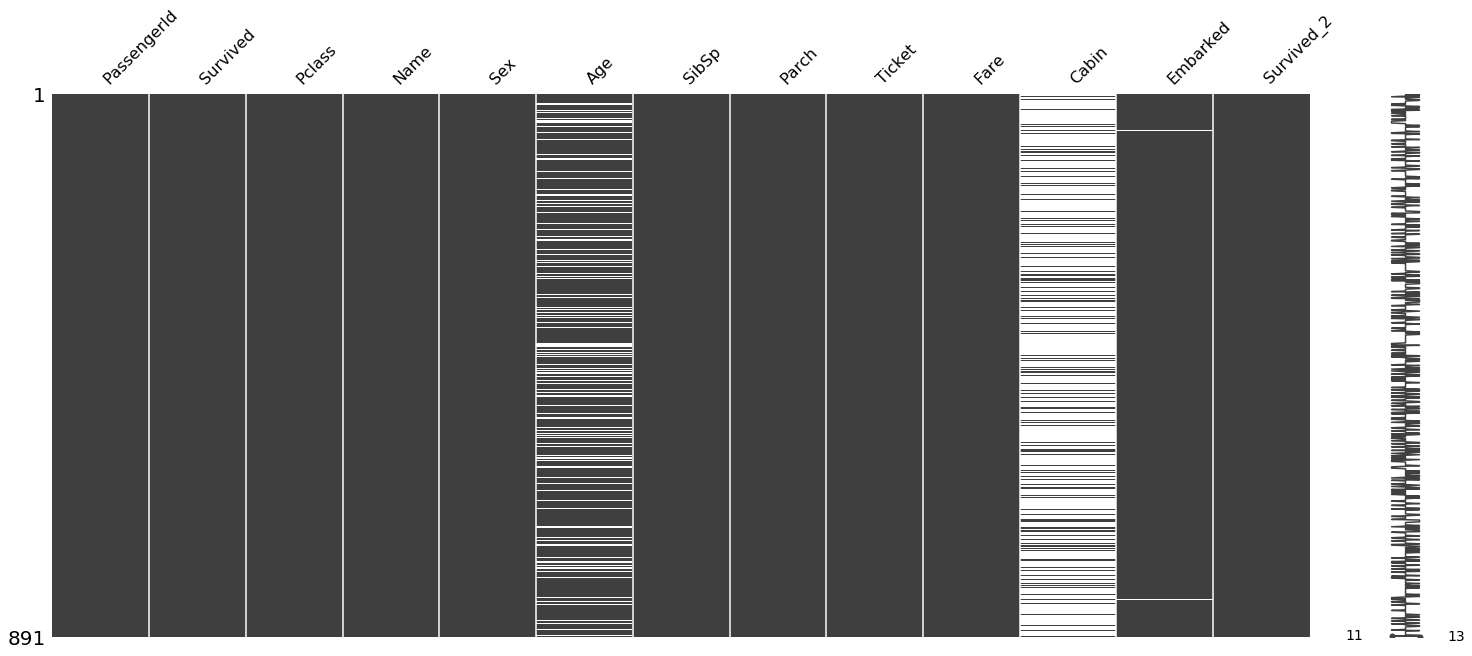

In [104]:
msno.matrix(train)   #결측값을 시각화로 한눈에 보기

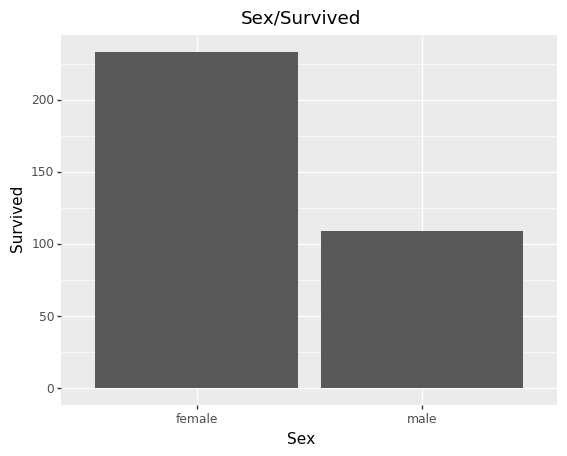

<ggplot: (-9223371927813570936)>

In [110]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False


(ggplot(train)
 +aes(x="Sex", y="Survived")
 +geom_col() #표 종류
 +ggtitle("Sex/Survived")
)

## 타이타닉 데이터 분석 (kaggle upload)

In [126]:
train=pd.read_csv("train.csv")
train
train.shape #891행 12열
#train.info()
train.head(10)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
test=pd.read_csv("test.csv")
#test.info()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [146]:
test["Survived"]=(test.Sex=="female") & (test.Embarked) & (test.Age>0)
test["Survived"].value_counts()

False    291
True     127
Name: Survived, dtype: int64

In [147]:
submission=test[["PassengerId","Survived"]]
submission.head(10)
submission["Survived"]=submission["Survived"].astype(int)
submission.head(10)

submission.to_csv("submission.csv", index=False) #csv저장

In [ ]:
#범주형 데이터 #원핫인코딩
혈액형: A B A AB O
    

In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null bool
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 36.5+ KB


In [152]:
obj_df=train.select_dtypes(include=["object"])
obj_df["Name"].isnull().sum()

In [160]:
#단 하나의 열이라도 Nan이 있으면 전체 행 추출

obj_df[obj_df.isnull().any(axis=1)].head(5) #any() : 누락된 값(NaN)이 하나라도 있으면 T

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S


In [161]:
obj_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
E50            1
C118           1
E46            1
D50            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [165]:
train[train["Sex"]=="male"]["Sex"]=0

In [166]:
train["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [169]:
train.loc[train["Sex"]=="male","Sex"]=0
train.loc[train["Sex"]=="female","Sex"]=1
train["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [173]:
test.loc[test["Sex"]=="male","Sex"]=0
test.loc[test["Sex"]=="female","Sex"]=1

test["Sex"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [193]:
from sklearn.preprocessing import LabelEncoder

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [194]:
#복사본 만들기
trainCopy=train.copy()
testCopy=test.copy()

In [196]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


#함수생성
def genToInt(data):
    le=LabelEncoder()
    le.fit(["male", "female"])
    data["Sex"]=le.transform(data["Sex"])
    return data
train=genToInt(train)
test=genToInt(test)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [208]:
#원핫인코딩 : Sex(남/여) Pclass(1/2/3) Embarked(C/Q/S)

dummy_col=["Sex", "Pclass", "Embarked"]


def myDummy(data, columns):
#각각 컬럼값을 원핫인코딩 => 리턴
    for column in columns:
        res=pd.get_dummies(data[column], prefix=column)
        data=pd.concat([data,res], axis=1)
        data=data.drop(column, axis=1)
    return data    


trainDummy=myDummy(train,dummy_col)
testDummy=myDummy(test,dummy_col)
print("원핫인코딩 전")
print(train.shape)
print(test.shape)

원핫인코딩 전
(891, 12)
(418, 11)


In [209]:
print("원핫인코딩 후")
print(trainDummy.shape)
print(testDummy.shape)

원핫인코딩 후
(891, 17)
(418, 16)


In [215]:
#train 데이터에서 "승객 id, 이름 , 티켓, 케빈" 드랍

trainX=trainDummy.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
trainX

testX=trainDummy.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
testX

,Survived,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,1,0,0,0,0,1
888,0,NaN,1,2,23.4500,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0
